In [81]:
import json 
import numpy as np 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, GlobalAveragePooling1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder

In [127]:
!pip install colorama

In [82]:
with open('intents.json') as file:
    data = json.load(file)
    
train_patterns = [] # patterns
train_intents = [] # tags
labels = [] #tags
responses = []


for intent in data['intents']:
    for pattern in intent['patterns']:
        train_patterns.append(pattern)
        train_intents.append(intent['tag'])
    responses.append(intent['responses'])
    
    if intent['tag'] not in labels:
        labels.append(intent['tag'])
        
num_classes = len(labels)

In [83]:
print("train_patterns :", train_patterns[100])
print("train_intents :", train_intents[100])
print("num_classes :", num_classes)

train_patterns : What to eat
train_intents : menu
num_classes : 22


### Then we use `LabelEncoder()` function provided by scikit-learn to convert the target labels into a model understandable form.

In [84]:
label_encoder = LabelEncoder()
label_encoder.fit(train_intents)
train_intents = label_encoder.transform(train_intents)

## Vectorization

- We vectorize our text data corpus by using the “Tokenizer” class and it allows us to limit our vocabulary size up to some defined number. 

- When we use this class for the text pre-processing task, by default all punctuations will be removed, turning the texts into space-separated sequences of words, and these sequences are then split into lists of tokens. 

- They will then be indexed or vectorized. We can also add “oov_token” which is a value for “out of token” to deal with out of vocabulary words(tokens) at inference time.

- The “pad_sequences” method is used to make all the training text sequences into the same size.

In [85]:
vocab_size = 11250
embedding_dim = 16
max_len = 20
oov_token = "<OOV>"

tokenizer = Tokenizer(num_words=vocab_size, oov_token=None)
tokenizer.fit_on_texts(train_patterns)

word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(train_patterns)

padded_sequences = pad_sequences(sequences, truncating='post', maxlen=max_len)

In [86]:
print("train_patterns :", train_patterns[99])
print("sequences: ", sequences[99])

train_patterns : I am hungry
sequences:  [2, 31, 127]


## 1) Here, we have to deal with multiple inputs or multiple outputs. Hence, we'll use `Keras` `Sequential()` model.

read more : [Kears Sequential model details](https://keras.io/guides/sequential_model/)

## 2) Loss Function: `sparse_categorical_crossentropy` : We are using this crossentropy loss function when there are two or more label classes.
read more about [sparse_categorical_crossentropy](https://www.tensorflow.org/api_docs/python/tf/keras/losses/SparseCategoricalCrossentropy)

In [87]:
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_len))
model.add(GlobalAveragePooling1D())
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 20, 16)            180000    
                                                                 
 global_average_pooling1d_1   (None, 16)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_3 (Dense)             (None, 16)                272       
                                                                 
 dense_4 (Dense)             (None, 16)                272       
                                                                 
 dense_5 (Dense)             (None, 22)                374       
                                                                 
Total params: 180,918
Trainable params: 180,918
Non-trainable params: 0
________________________________________________

In [88]:
epochs = 500
history = model.fit(padded_sequences, np.array(train_intents), epochs=epochs)

Epoch 1/500
12/12 [==============================] - ETA: 8s - loss: 3.0913 - accuracy: 0.0000e+ - ETA: 0s - loss: 3.0904 - accuracy: 0.0703   - 1s 7ms/step - loss: 3.0890 - accuracy: 0.0842
Epoch 2/500
12/12 [==============================] - ETA: 0s - loss: 3.0858 - accuracy: 0.06 - ETA: 0s - loss: 3.0790 - accuracy: 0.14 - 0s 6ms/step - loss: 3.0790 - accuracy: 0.1495
Epoch 3/500
12/12 [==============================] - ETA: 0s - loss: 3.0665 - accuracy: 0.21 - 0s 4ms/step - loss: 3.0681 - accuracy: 0.1522
Epoch 4/500
12/12 [==============================] - ETA: 0s - loss: 3.0612 - accuracy: 0.15 - 0s 4ms/step - loss: 3.0530 - accuracy: 0.1549
Epoch 5/500
12/12 [==============================] - ETA: 0s - loss: 3.0517 - accuracy: 0.18 - 0s 4ms/step - loss: 3.0362 - accuracy: 0.1549
Epoch 6/500
12/12 [==============================] - ETA: 0s - loss: 3.0228 - accuracy: 0.21 - 0s 4ms/step - loss: 3.0126 - accuracy: 0.1848
Epoch 7/500
12/12 [==============================] - ETA: 0s -

Epoch 116/500
12/12 [==============================] - ETA: 0s - loss: 0.5772 - accuracy: 0.87 - 0s 3ms/step - loss: 0.4655 - accuracy: 0.9130
Epoch 117/500
12/12 [==============================] - ETA: 0s - loss: 0.4233 - accuracy: 0.93 - 0s 3ms/step - loss: 0.4540 - accuracy: 0.9212
Epoch 118/500
12/12 [==============================] - ETA: 0s - loss: 0.3643 - accuracy: 0.93 - 0s 3ms/step - loss: 0.4423 - accuracy: 0.9239
Epoch 119/500
12/12 [==============================] - ETA: 0s - loss: 0.3749 - accuracy: 0.93 - 0s 3ms/step - loss: 0.4312 - accuracy: 0.9239
Epoch 120/500
12/12 [==============================] - ETA: 0s - loss: 0.3509 - accuracy: 1.00 - 0s 4ms/step - loss: 0.4219 - accuracy: 0.9239
Epoch 121/500
12/12 [==============================] - ETA: 0s - loss: 0.3010 - accuracy: 0.96 - 0s 4ms/step - loss: 0.4122 - accuracy: 0.9266
Epoch 122/500
12/12 [==============================] - ETA: 0s - loss: 0.3727 - accuracy: 1.00 - 0s 3ms/step - loss: 0.4022 - accuracy: 0.9348

12/12 [==============================] - ETA: 0s - loss: 0.0469 - accuracy: 1.00 - ETA: 0s - loss: 0.0310 - accuracy: 1.00 - 0s 8ms/step - loss: 0.0346 - accuracy: 0.9973
Epoch 230/500
12/12 [==============================] - ETA: 0s - loss: 0.0348 - accuracy: 1.00 - 0s 4ms/step - loss: 0.0332 - accuracy: 0.9973
Epoch 231/500
12/12 [==============================] - ETA: 0s - loss: 0.0433 - accuracy: 1.00 - 0s 3ms/step - loss: 0.0330 - accuracy: 0.9973
Epoch 232/500
12/12 [==============================] - ETA: 0s - loss: 0.0166 - accuracy: 1.00 - 0s 3ms/step - loss: 0.0319 - accuracy: 0.9973
Epoch 233/500
12/12 [==============================] - ETA: 0s - loss: 0.0272 - accuracy: 1.00 - 0s 3ms/step - loss: 0.0319 - accuracy: 0.9946
Epoch 234/500
12/12 [==============================] - ETA: 0s - loss: 0.0376 - accuracy: 1.00 - 0s 3ms/step - loss: 0.0310 - accuracy: 0.9973
Epoch 235/500
12/12 [==============================] - ETA: 0s - loss: 0.0493 - accuracy: 1.00 - 0s 3ms/step - los

12/12 [==============================] - ETA: 0s - loss: 0.0237 - accuracy: 1.00 - 0s 3ms/step - loss: 0.0094 - accuracy: 0.9973
Epoch 343/500
12/12 [==============================] - ETA: 0s - loss: 0.0496 - accuracy: 0.96 - 0s 4ms/step - loss: 0.0087 - accuracy: 0.9973
Epoch 344/500
12/12 [==============================] - ETA: 0s - loss: 0.0048 - accuracy: 1.00 - 0s 4ms/step - loss: 0.0094 - accuracy: 0.9973
Epoch 345/500
12/12 [==============================] - ETA: 0s - loss: 0.0051 - accuracy: 1.00 - 0s 3ms/step - loss: 0.0088 - accuracy: 0.9973
Epoch 346/500
12/12 [==============================] - ETA: 0s - loss: 0.0050 - accuracy: 1.00 - 0s 3ms/step - loss: 0.0092 - accuracy: 0.9973
Epoch 347/500
12/12 [==============================] - ETA: 0s - loss: 0.0042 - accuracy: 1.00 - 0s 4ms/step - loss: 0.0088 - accuracy: 0.9946
Epoch 348/500
12/12 [==============================] - ETA: 0s - loss: 0.0041 - accuracy: 1.00 - 0s 3ms/step - loss: 0.0091 - accuracy: 0.9973
Epoch 349/500

12/12 [==============================] - ETA: 0s - loss: 0.0014 - accuracy: 1.00 - ETA: 0s - loss: 0.0057 - accuracy: 0.99 - 0s 7ms/step - loss: 0.0056 - accuracy: 0.9973
Epoch 456/500
12/12 [==============================] - ETA: 0s - loss: 0.0013 - accuracy: 1.00 - 0s 4ms/step - loss: 0.0066 - accuracy: 0.9973
Epoch 457/500
12/12 [==============================] - ETA: 0s - loss: 0.0149 - accuracy: 1.00 - 0s 3ms/step - loss: 0.0054 - accuracy: 0.9973
Epoch 458/500
12/12 [==============================] - ETA: 0s - loss: 0.0014 - accuracy: 1.00 - 0s 4ms/step - loss: 0.0061 - accuracy: 0.9973
Epoch 459/500
12/12 [==============================] - ETA: 0s - loss: 0.0019 - accuracy: 1.00 - 0s 4ms/step - loss: 0.0057 - accuracy: 0.9973
Epoch 460/500
12/12 [==============================] - ETA: 0s - loss: 9.4832e-04 - accuracy: 1.00 - 0s 4ms/step - loss: 0.0058 - accuracy: 0.9946
Epoch 461/500
12/12 [==============================] - ETA: 0s - loss: 0.0213 - accuracy: 1.00 - 0s 4ms/step -

In [89]:
history_dict = history.history

Text(0.5, 0, 'Epochs')

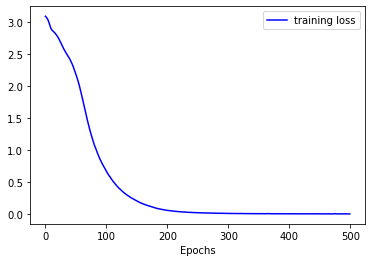

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


loss_values = history_dict['loss']
#val_loss_values=history_dict['val_loss']
plt.plot(loss_values,'b',label='training loss')
#plt.plot(val_loss_values,'r',label='val training loss')
plt.legend()
plt.xlabel("Epochs")

Text(0.5, 0, 'Epochs')

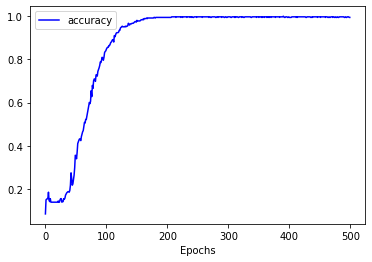

In [91]:
accuracy_values = history_dict['accuracy']
#val_accuracy_values=history_dict['val_accuracy']
#plt.plot(val_accuracy_values,'-r',label='val_accuracy')
plt.plot(accuracy_values,'-b',label='accuracy')
plt.legend()
plt.xlabel("Epochs")

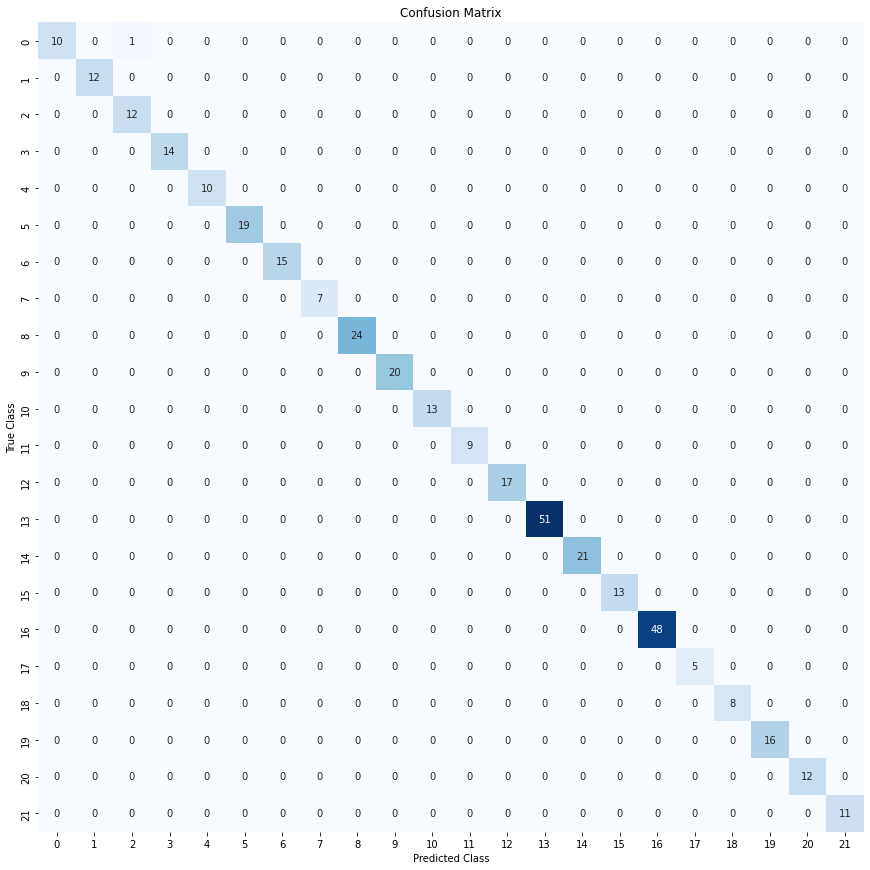

In [92]:
y_pred = model.predict(padded_sequences)
y_result=[]
for i in y_pred:
    max_value = max(i)
    #print(max_value)
    y_result.append(np.where(i == max_value)[0][0])





from sklearn.metrics import confusion_matrix
#CM matrix for training data
plt.figure(figsize=(12,12))

matrix_nn = confusion_matrix(y_result, np.array(train_intents))

sns.heatmap(matrix_nn, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

## Save the models

We are saving 3 different things separately
- Classification model
- fitted Tokenizer object
- fitted label encoder object

In [93]:
# saving model
model.save("chat_model")

import pickle

# saving tokenizer
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)
    

# saving label encoder
with open('label_encoder.pickle', 'wb') as ecn_file:
    pickle.dump(label_encoder, ecn_file, protocol=pickle.HIGHEST_PROTOCOL)

INFO:tensorflow:Assets written to: chat_model\assets


In [94]:
!pip install pymongo

In [95]:
import json
import random
import datetime
import pymongo
import uuid

In [96]:
seat_count = 50
import urllib.parse
# Make sure Settings->Network Access has correct settings



password=urllib.parse.quote_plus(<Insert your password>)
database = urllib.parse.quote_plus("RestroData")

URI= "mongodb+srv://<Insert here user/hostname>:" + password + "@cluster0.jpcjh.mongodb.net/" + database + "?" + "retryWrites=true&w=majority"
#client = pymongo.MongoClient(URI)
client = pymongo.MongoClient(URI, connect=False)

db = client["RestroData"]
menu_collection = db["menu"]
feedback_collection = db["feedback"]
bookings_collection = db["bookings"]

In [97]:
query = {"mainmenu": "Y"}

veg_data = menu_collection.find(query)
x=[]
for i in veg_data:
    if (i.get("breakfast")=="N") == True:
        x.append(i.get("item"))
x

['Soups',
 'Starters',
 'Main Course',
 'Snacks',
 'Snacks',
 'Breakfast',
 'accompaniments']

In [98]:
x

['Soups',
 'Starters',
 'Main Course',
 'Snacks',
 'Snacks',
 'Breakfast',
 'accompaniments']

In [125]:
# Book a table:
seat_count = 50
def book_table():
    global seat_count
    seat_count = seat_count - 1
    booking_id = str(uuid.uuid4())
    now = datetime.datetime.now()
    booking_time = now.strftime("%Y-%m-%d %H:%M:%S")
    booking_doc = {"booking_id": booking_id, "booking_time": booking_time}
    bookings_collection.insert_one(booking_doc)
    return booking_id


def get_specific_response(tag):
    for intent in data['intents']:
        if intent['tag'] == tag:
            responses = intent['responses']
    response = random.choice(responses)
    return response


def show_menu():
    all_items = menu_collection.distinct('item')
    response = ', '.join(all_items)
    return response

def record_feedback(message, type):
    print("Recording your feedback")
    feedback_doc = {"feedback_string": message, "type": type}
    feedback_collection.insert_one(feedback_doc)
    
def recipe_enquiry(message):
    response=""
    for i in menu_collection.distinct('item'):
    #print(i)
        if inp.lower()== i.lower():
            print(i)
            query_about= {"item":i}
            about = menu_collection.find(query_about)
            for j in about:
                response = j.get("details")
        
            
    if "" == response:
        response = "I don't know much about this recipe! But, you can contact our restaurant for more details."
    return response


def suggest():
    day = datetime.datetime.now()
    day = day.strftime("%A")
    if day == "Monday":
        response = "I would recommend: Paneer Roll and Chicken Biryani"
    elif day == "Tuesday":
        response = "I would recommend: Cheese Grilled Sandwich and Chicken tripple rice"

    elif day == "Wednesday":
        response = "I would recommend: Egg Rolla and Latte "

    elif day == "Thursday":
        response = "I would recommend: Mixed Fruit Juice and Chicken cheese sandwich"

    elif day == "Friday":
        response = "I would recommend: White Sauce Pasta and Cheese cake"

    elif day == "Saturday":
        response = "I would recommend: Chicken Roll and cold coffee"

    elif day == "Sunday":
        response = "I would recommend: Schezwan Rice and Manchurian"
    return response


def veg_menu():
    res=[]    
    query = {"veg": "Y"}
    veg_doc = menu_collection.find(query)
    for x in veg_doc:
        res.append(str(x.get("item")) + " for Rs. " + str(x.get("cost")) + "\n")
        #response = response[:-2] # to remove the last ;
        #print(response,"\n")
    return res

"""def nonveg_menu():
    query = {"nonveg": "Y"}
    vegan_doc = menu_collection.find(query)
    if vegan_doc.count() > 0:
        response = "Non-Vegetarian options are: "
        for x in vegan_doc:
            response = response + str(x.get("item")) + " for Rs. " + str(x.get("cost")) + "; "
        response = response[:-2] # to remove the last ;
    else:
        response = "Sorry no vegetarian options are available"
    return response
"""

def nonveg_menu():
    re=[]
    query = {"nonveg": "Y"}
    doc = menu_collection.find(query)
    for x in doc:
        re.append(str(x.get("item")) + " for Rs. " + str(x.get("cost")) + "\n")
        #response = response[:-2] # to remove the last ;
        #print(response,"\n")
    return re




def breakfast_menu():
    br=[]
    query = {"breakfast": "Y"}
    doc = menu_collection.find(query)
    for x in doc:
        br.append(str(x.get("item")) + " for Rs. " + str(x.get("cost")) + "\n")
        #response = response[:-2] # to remove the last ;
        #print(response,"\n")
    return br

def bevrages_menu():
    bev=[]
    query = {"icecreams_bev": "Y"}
    doc = menu_collection.find(query)
    for x in doc:
        bev.append(str(x.get("item")) + " for Rs. " + str(x.get("cost")) + "\n")
        #response = response[:-2] # to remove the last ;
        #print(response,"\n")
    return bev

def desert_menu():
    de=[]
    query = {"Desert": "Y"}
    doc = menu_collection.find(query)
    for x in doc:
        de.append(str(x.get("item")) + " for Rs. " + str(x.get("cost")) + "\n")
        #response = response[:-2] # to remove the last ;
        #print(response,"\n")
    return de

def snacks_menu():
    sn=[]
    query = {"snacks": "Y"}
    doc = menu_collection.find(query)
    for x in doc:
        sn.append(str(x.get("item")) + " for Rs. " + str(x.get("cost")) + "\n")
        #response = response[:-2] # to remove the last ;
        #print(response,"\n")
    return sn


def main_menu():
    menu=[]
    query = {"mainmenu": "Y"}
    doc = menu_collection.find(query)
    for x in doc:
        menu.append(str(x.get("item")) +"\n")
   
    return menu

def offers():
    
    response = "Sorry there are no offers available now."
    return response

In [126]:
def generate_response(tag, user_input):
    global seat_count
    #tag = get_intent(message)
    response = ""
    if tag != "":
        if tag == "book_table":

            if seat_count > 0:
                booking_id = book_table()
                response = "Your table has been booked successfully" + str(
                    booking_id)
            else:
                response = "Sorry we are sold out now!"


        elif tag == "available_tables":
            response = "Right now, there are " + str(seat_count) + " table(s) available."

        elif tag == "veg_enquiry":
            response =veg_menu()

        elif tag == "nonveg_enquiry":
            response =nonveg_menu()
            
        elif tag == "vegan_enquiry":
            response = vegan_menu()

        elif tag == "offers":
            response =offers()

        elif tag == "suggest":
            response =suggest()

        elif tag == "recipe_enquiry":
            response =recipe_enquiry(user_input)

        elif tag == "menu":
            response=main_menu()  #show_menu()
            
        elif tag == "Icecreams_bevrages":
            response = bevrages_menu()
            
        elif tag == "Quick_Bites":
            response1 = snacks_menu()
            response2= breakfast_menu()
            response3 = bevrages_menu()
            response = response1 + response2 + response3
            
        elif tag == "positive_feedback":
            record_feedback(user_input, "positive")
            response = "Thank you so much for your valuable feedback. We look forward to serving you again!"

        elif "negative_feedback" == tag:
            record_feedback(user_input, "negative")
            response = "Thank you so much for your valuable feedback. We deeply regret the inconvenience. We have " \
                       "forwarded your concerns to the authority and hope to satisfy you better the next time! "
        # for other intents with pre-defined responses that can be pulled from dataset
        else:
            response = get_specific_response(tag)
    else:
        response = "Sorry! I didn't get it, please try to be more precise."
    return response


### Load the model

In [128]:
import json 
import numpy as np
from tensorflow import keras
from sklearn.preprocessing import LabelEncoder

import colorama 
colorama.init()
from colorama import Fore, Style, Back

import random
import pickle

with open("intents.json") as file:
    data = json.load(file)


def chat():
    # load trained model
    model = keras.models.load_model('chat_model')

    # load tokenizer object
    with open('tokenizer.pickle', 'rb') as handle:
        tokenizer = pickle.load(handle)

    # load label encoder object
    with open('label_encoder.pickle', 'rb') as enc:
        lbl_encoder = pickle.load(enc)

    # parameters
    max_len = 20
    
    while True:
        print(Fore.LIGHTBLUE_EX + "User: " + Style.RESET_ALL, end="")
        inp = input()
        if inp.lower() == "quit":
            break

        result = model.predict(keras.preprocessing.sequence.pad_sequences(tokenizer.texts_to_sequences([inp]),truncating='post', maxlen=max_len))
        #print("result: ", result)
        #print(result.max())
        #print(np.where(result == (result.max())))

        ## Find the intent
        tag = lbl_encoder.inverse_transform([np.argmax(result)])
        print(tag)

        for i in data['intents']:
            if i['tag'] == tag:
                output = generate_response(tag, inp)
                #print(len(output))
                print(Fore.GREEN + "ChatBot:" + Style.RESET_ALL , output)
                #print(Fore.GREEN + "ChatBot:" + Style.RESET_ALL , np.random.choice(i['responses']))

        

print(Fore.YELLOW + "Start messaging with the bot (type quit to stop)!" + Style.RESET_ALL)
chat()

Start messaging with the bot (type quit to stop)!
User: Hi
['greeting']
ChatBot: Hello I'm Restrobot! How can I help you?
User: Who are You
['identity']
ChatBot: I'm Restrobot.
User: How many tables are available
['available_tables']
ChatBot: Right now, there are 50 table(s) available.
User: I need a table for 3
['book_table']
ChatBot: Your table has been booked successfullye208f28b-ecfc-4225-b4bc-fc4c567a5896
User: okay
['general']
ChatBot: Happy to help!
User: when are you guys open to serve
['hours']
ChatBot: We are open 10am-11pm Monday-Saturday!
User: I am hungry
['menu']
ChatBot: ['Soups\n', 'Starters\n', 'Main Course\n', 'Snacks\n', 'Snacks\n', 'Breakfast\n', 'accompaniments\n']
User: suggest me something
['suggest']
ChatBot: I would recommend: Paneer Roll and Chicken Biryani
User: I am vegetarian
['veg_enquiry']
ChatBot: ['Paneer Chilli for Rs. 300\n', 'Baby Corn Tikka for Rs. 250\n', 'Mushroom Tikka for Rs. 250\n', 'Paneer Tikka for Rs. 250\n', 'Veg Manchurian for Rs. 180\n', 

['address']
ChatBot: You can locate us at --
User: hmm
['general']
ChatBot: Always happy to assist you!
User: ok, i am bored, Bye for now
['goodbye']
ChatBot: Hope to see you again soon! Goodbye!
User: quit


### TODO
Offers<br>
Cancel Table<br>
item based search<br>
order status


